In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
from sklearn.datasets import make_blobs

In [29]:
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=.7, random_state=0)

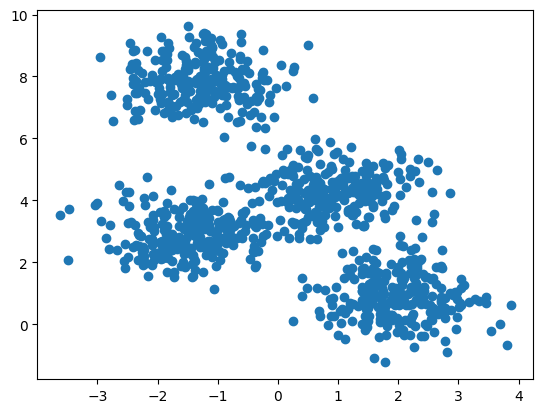

In [30]:
plt.scatter(X[:,0], X[:,1])

In [31]:
from sklearn.metrics import pairwise_distances_argmin

indices = np.random.choice(np.arange(300), 2, replace=False)
indices
centers = X[indices]


In [32]:
from sklearn.metrics import pairwise_distances_argmin

def our_kmeans(X, n_clusters, randomseed):
    np.random.seed(randomseed)
    indices = np.random.choice(np.arange(X.shape[0]), n_clusters, replace=False)
    centers = X[indices]
    
    while True:
        #evaluete the z, our assignments based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # update centers
        new_centers = np.zeros((n_clusters,X.shape[1]))
        for j in range(n_clusters):
            cluster_mean = np.zeros(X.shape[1])
            cluster_size = 0
            for i in range(X.shape[0]):
                if labels[i] == j:
                    cluster_mean += X[i]
                    cluster_size +=1
            cluster_mean /= cluster_size
            new_centers[j] = cluster_mean
        
        # checking convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

In [33]:
centers, labels = our_kmeans(X, 4, 1)

In [34]:
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=.7, random_state=0)
centers, labels = our_kmeans(X, 4, 1)

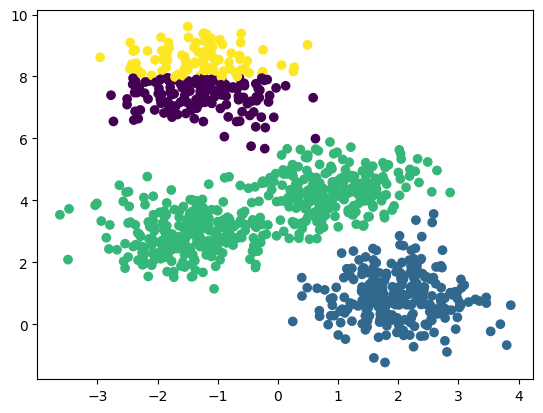

In [35]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')

In [36]:
#K-means++

def our_kmeans_plusplus(X, n_clusters, randomseed):
    np.random.seed(randomseed)
    
    #selecting the first center at random
    centers = np.zeros((n_clusters, X.shape[1]))
    ind_cent = np.random.choice(np.arange(X.shape[0]), 1)
    centers[0] = X[ind_cent]
    indexes = [ind_cent]
    
    #selecting other centers
    for j in range(1, n_clusters):
        probs = np.zeros(X.shape[0])
        print(centers[:j])
        for i in range(X.shape[0]):
            
            d = np.linalg.norm(X[i]-centers[:j])**2
            probs[i] = np.min(d)
        
        probs /= np.sum(probs)
        print(probs)
        ind_cent = np.random.choice(np.arange(X.shape[0]),1,p = probs)
        
        centers[j] = X[ind_cent]
        indexes.append(ind_cent)
    
    while True:
        #evaluete the z, our assignments based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # update centers
        new_centers = np.zeros((n_clusters,X.shape[1]))
        for j in range(n_clusters):
            cluster_mean = np.zeros(X.shape[1])
            cluster_size = 0
            for i in range(X.shape[0]):
                if labels[i] == j:
                    cluster_mean += X[i]
                    cluster_size +=1
            cluster_mean /= cluster_size
            new_centers[j] = cluster_mean
        
        # checking convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels
    
    

In [37]:
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=.7, random_state=0)
centers, labels = our_kmeans_plusplus(X, 4, 1)

[[1.76491522 3.54783527]]
[2.64837850e-03 1.18870392e-04 3.19153188e-03 1.56927490e-03
 4.56841100e-04 1.43680228e-04 2.50422183e-04 1.79601614e-03
 6.57692136e-05 3.89840293e-04 2.75526105e-03 3.20549374e-04
 9.55943958e-04 2.20904749e-03 2.59076205e-04 1.45881338e-03
 1.52149220e-03 1.88394080e-03 1.93351991e-04 3.58394920e-04
 3.17914772e-04 1.54391437e-03 5.21001411e-04 1.00140184e-03
 5.44371860e-04 1.25513025e-03 2.87795147e-04 6.97892049e-04
 5.85709640e-04 1.03360574e-03 8.22215722e-04 1.02455150e-04
 3.06460678e-03 5.42904631e-04 1.10028106e-03 2.66020210e-04
 2.19929281e-03 0.00000000e+00 4.40361224e-04 6.51063537e-04
 3.93868442e-04 2.14847964e-04 1.13275106e-04 9.96682989e-04
 1.93694831e-03 9.53634492e-05 2.78409168e-05 2.20316418e-03
 8.44936014e-04 1.75941207e-04 6.36214372e-04 1.79467110e-04
 2.40248476e-04 7.99667192e-04 1.69505900e-03 2.40863710e-04
 3.84000468e-04 2.23390811e-04 2.54825639e-03 1.53415786e-03
 5.68858317e-04 2.80035051e-04 9.91310749e-04 1.09264910e-0

In [38]:
centers, labels = our_kmeans_plusplus(X, 4, 1)
centers_, labels_ = our_kmeans(X, 4, 1)

[[1.76491522 3.54783527]]
[2.64837850e-03 1.18870392e-04 3.19153188e-03 1.56927490e-03
 4.56841100e-04 1.43680228e-04 2.50422183e-04 1.79601614e-03
 6.57692136e-05 3.89840293e-04 2.75526105e-03 3.20549374e-04
 9.55943958e-04 2.20904749e-03 2.59076205e-04 1.45881338e-03
 1.52149220e-03 1.88394080e-03 1.93351991e-04 3.58394920e-04
 3.17914772e-04 1.54391437e-03 5.21001411e-04 1.00140184e-03
 5.44371860e-04 1.25513025e-03 2.87795147e-04 6.97892049e-04
 5.85709640e-04 1.03360574e-03 8.22215722e-04 1.02455150e-04
 3.06460678e-03 5.42904631e-04 1.10028106e-03 2.66020210e-04
 2.19929281e-03 0.00000000e+00 4.40361224e-04 6.51063537e-04
 3.93868442e-04 2.14847964e-04 1.13275106e-04 9.96682989e-04
 1.93694831e-03 9.53634492e-05 2.78409168e-05 2.20316418e-03
 8.44936014e-04 1.75941207e-04 6.36214372e-04 1.79467110e-04
 2.40248476e-04 7.99667192e-04 1.69505900e-03 2.40863710e-04
 3.84000468e-04 2.23390811e-04 2.54825639e-03 1.53415786e-03
 5.68858317e-04 2.80035051e-04 9.91310749e-04 1.09264910e-0

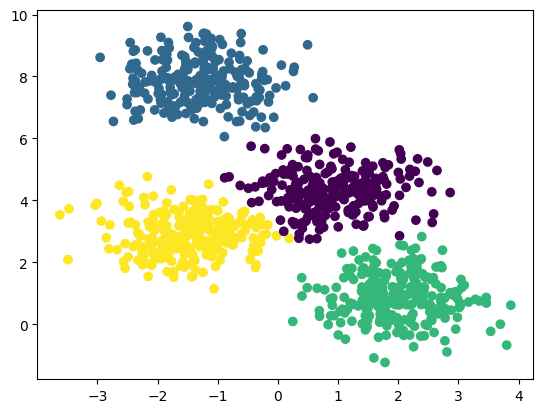

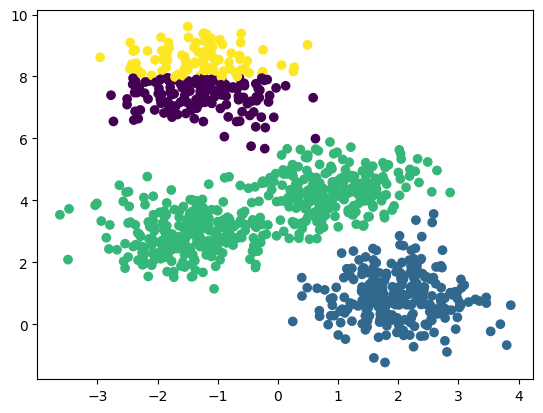

In [39]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.show()
plt.scatter(X[:,0], X[:,1], c=labels_, cmap='viridis')
plt.show()

In [40]:
from sklearn.cluster import KMeans

In [41]:
labels = KMeans(4, random_state=0).fit_predict(X)

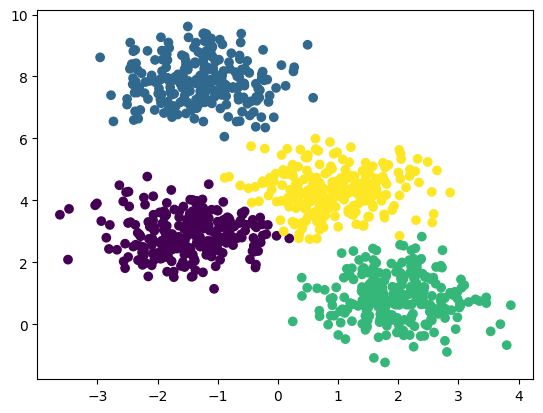

In [42]:
plt.scatter(X[:,0], X[:,1], c= labels, cmap = 'viridis')

In [43]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

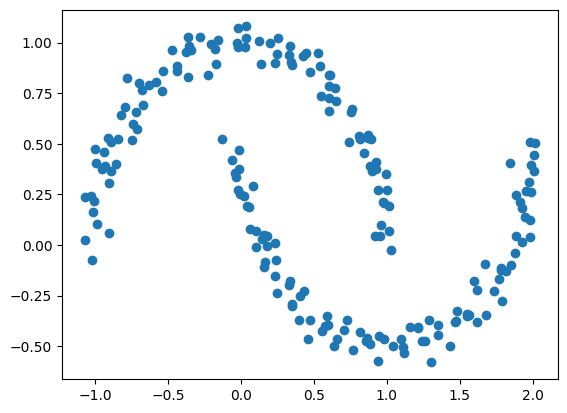

In [44]:
plt.scatter(X[:,0], X[:,1])

In [45]:
labels = KMeans(2, random_state=0).fit_predict(X)

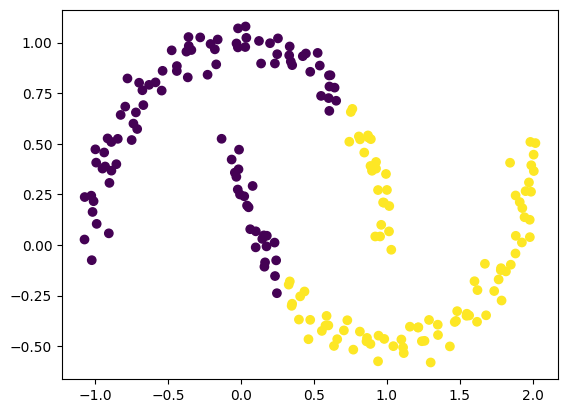

In [46]:
plt.scatter(X[:,0], X[:,1], c=labels)

In [47]:
from sklearn.cluster import SpectralClustering
labels = SpectralClustering(n_clusters=2, assign_labels='kmeans', affinity='nearest_neighbors').fit_predict(X)


c:\Users\appenteng.adjepong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


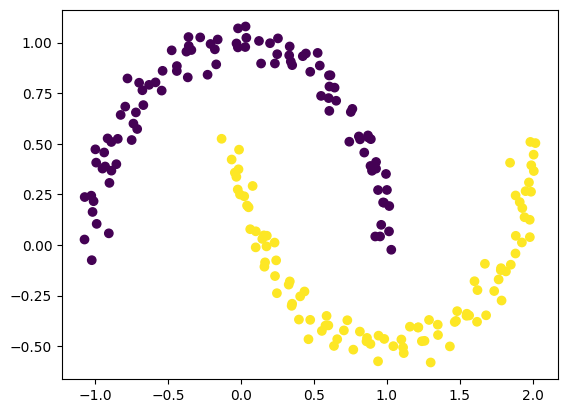

In [48]:
plt.scatter(X[:,0], X[:,1], c=labels)

In [49]:
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=.7, random_state=0)

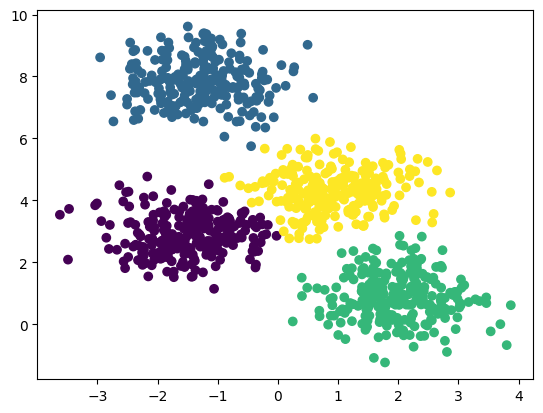

In [50]:
labels = SpectralClustering(n_clusters=4, assign_labels='kmeans', affinity='nearest_neighbors').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)